# Data Scientist Challenge - LATAM Airlines

### Busqueda bibliográfica

Lo primero que hice fue una búsqueda bibliográfica no demasiada extensa por cuestiones de tiempo, para intentar ver qué había hecho sobre el tema, se encontraron algunos artículos y páginas interesantes:

https://ddd.uab.cat/pub/tfg/2016/169883/MartinezDomenechNerea-TFGAa2015-16.pdf (Este documento que aparentemente es una tesis de grado, fue util para como referencia de variables y algoritmos usados. Además tiene la estimación del beneficio económico de prevenir retrasos en vuelos. Algo que no siempre es fácil de conseguir en los proyectos de DS)

https://www.kaggle.com/code/fabiendaniel/predicting-flight-delays-tutorial (este articulo en formato jupyter notebook puede ser util para obtener ideas si es necesario hacer una exploración de datos más detallada, y como referencia de variables usadas)

https://medium.com/@diegitsen/predecir-retrasos-de-vuelo-en-el-aeropuerto-de-madrid-parte-2-c%C3%B3digo-en-python-cc4c39222577 (este articulo finalmente no aportó mucho pero fue una buena referencia como para empezar a entrar en tema, ver qué había hecho y evitar repetir lo que ya es conocido.)


Por otro lado hice una exploración en PowerBI, que si bien no es parte del ejercicio, es una excelente herramienta para un primer encuentro con los datos, a mi entender superior a Jupyter/Python. En el pasado he obtenido resultados muy buenos por la velocidad con que se puede desplegar un tablero y empezar a jugar con el mismo. Creo que es bueno para un Científico de datos tener varias herramientas en la baulera. Se agregaron algunas capturas de los gráficos más interesantes para este caso.

In [86]:
#Importación de las ibrerías que se usaron en el notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

### Datos

In [187]:
#Lectura de datos

df = pd.read_csv('data/dataset_SCL.csv')

#Algunas transformaciones que fueron necesarias

df[['Fecha-I', 'Fecha-O']] = df[['Fecha-I', 'Fecha-O']].astype('datetime64[ns]') # Esto es para poder hacer operaciones como dt.hour
df['Vlo-I'] = "'" + df['Vlo-I'].map(str) + "'" #Esto es para que no haya errores porque algunos vuelos eran numéricos y otros alfanuméricos
df['Vlo-O'] = "'" + df['Vlo-O'].map(str) + "'" #idem anterior

C:\Users\andrew.mercader\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Visualización y primer entendimiento de los datos

### Apéndice

In [113]:

  
# create a group using groupby
group = df.groupby(['MES'])
  
# size of group to count observations
group = group.size()
  
# make a column name 
group.reset_index(name='Observation')


,MES,Observation
0,1,6108
1,2,5561
2,3,5482
3,4,5020
4,5,5240
5,6,4981
6,7,5992
7,8,5744
8,9,5610
9,10,6032


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,'226',SCEL,KMIA,AAL,2017-01-01 23:33:00,'226',SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,'226',SCEL,KMIA,AAL,2017-01-02 23:39:00,'226',SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,'226',SCEL,KMIA,AAL,2017-01-03 23:39:00,'226',SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,'226',SCEL,KMIA,AAL,2017-01-04 23:33:00,'226',SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,'226',SCEL,KMIA,AAL,2017-01-05 23:28:00,'226',SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,'400',SCEL,SPJC,JAT,2017-12-22 15:41:00,'400.0',SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,'400',SCEL,SPJC,JAT,2017-12-25 15:11:00,'400.0',SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,'400',SCEL,SPJC,JAT,2017-12-27 15:35:00,'400.0',SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,'400',SCEL,SPJC,JAT,2017-12-29 15:08:00,'400.0',SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


In [7]:
#revisemos las información que nos brinda pandas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68206 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [8]:
#descriptive statistics summary variables numérricas
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [104]:
df['Vlo-I', 'Ori-I', 'Des-I'].groupby(['MES']).mean()

KeyError: 'MES'

In [9]:
#descriptive statistics summary para variables categóricas
df[['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES']].describe()

C:\Users\ANDREW~1.MER\AppData\Local\Temp/ipykernel_10524/1130334096.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
count,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206,68206
unique,53252,584,1,64,30,62774,862,1,63,32,7,2,23,1,62
top,2017-07-28 13:30:00,'174',SCEL,SCFA,LAN,2017-11-05 14:51:00,'174',SCEL,SCFA,LAN,Viernes,N,Grupo LATAM,Santiago,Buenos Aires
freq,6,686,68206,5787,37611,5,649,68206,5786,20988,10292,36966,40892,68206,6335
first,2017-01-01 00:15:00,NaN,NaN,NaN,NaN,2017-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-12-31 23:55:00,NaN,NaN,NaN,NaN,2018-01-01 00:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Una primera mirada de los datos
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,'226',SCEL,KMIA,AAL,2017-01-01 23:33:00,'226',SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,'226',SCEL,KMIA,AAL,2017-01-02 23:39:00,'226',SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,'226',SCEL,KMIA,AAL,2017-01-03 23:39:00,'226',SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,'226',SCEL,KMIA,AAL,2017-01-04 23:33:00,'226',SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,'226',SCEL,KMIA,AAL,2017-01-05 23:28:00,'226',SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [11]:
df.tail()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
68201,2017-12-22 14:55:00,'400',SCEL,SPJC,JAT,2017-12-22 15:41:00,'400.0',SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,'400',SCEL,SPJC,JAT,2017-12-25 15:11:00,'400.0',SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,'400',SCEL,SPJC,JAT,2017-12-27 15:35:00,'400.0',SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,'400',SCEL,SPJC,JAT,2017-12-29 15:08:00,'400.0',SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68205,2017-12-31 14:55:00,'400',SCEL,SPJC,JAT,2017-12-31 15:04:00,'400.0',SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima


In [12]:
#Porcentaje de vuelos según aerolínea
df['Emp-O'].value_counts(normalize = True)*100

LAN    30.771486
LXP    21.344163
SKU    20.962965
TAM     4.465883
ARG     2.853121
CMP     2.712371
JMR     2.414744
LPE     1.779902
JAT     1.605431
AVA     1.297540
GLO     1.181714
AAL     1.109873
ACA     0.828373
DSM     0.722810
LNE     0.548339
IBE     0.530745
AFR     0.524881
DAL     0.524881
LRC     0.523414
AMX     0.514617
UAL     0.491159
ONE     0.409055
AZA     0.379732
KLM     0.368003
LAP     0.321086
BAW     0.300560
QFA     0.285899
AUT     0.112893
PUE     0.071841
56R     0.024924
48O     0.014661
TPU     0.002932
Name: Emp-O, dtype: float64

In [13]:
#Porcentaje de vuelos según aerolínea
df['SIGLADES'].value_counts()

Buenos Aires      6335
Antofagasta       5786
Lima              5270
Calama            5146
Puerto Montt      4357
                  ... 
Quito                2
Washington           1
Pisco, Peru          1
Puerto Stanley       1
Cochabamba           1
Name: SIGLADES, Length: 62, dtype: int64

##### Pie charts

In [185]:
(df.columns.values)[2]


'Ori-I'

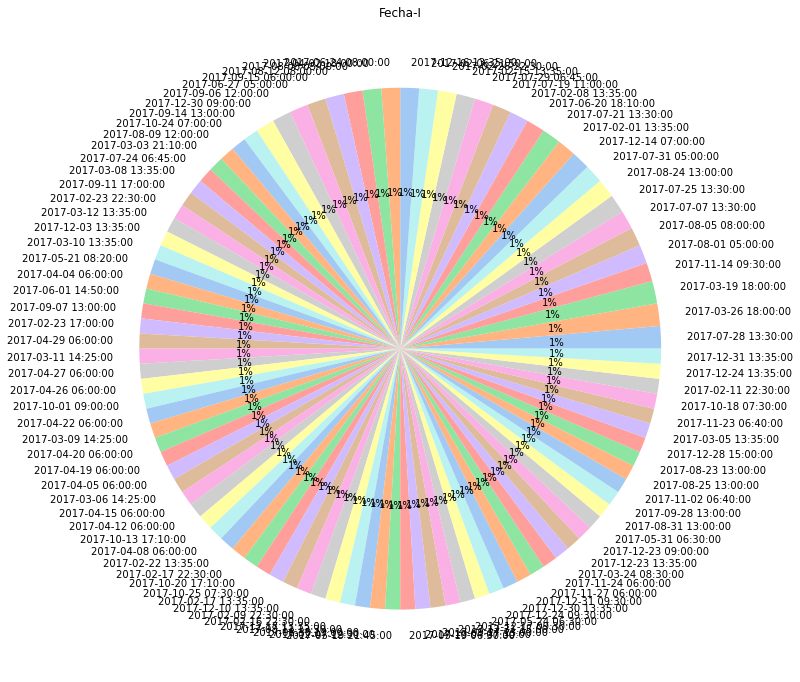

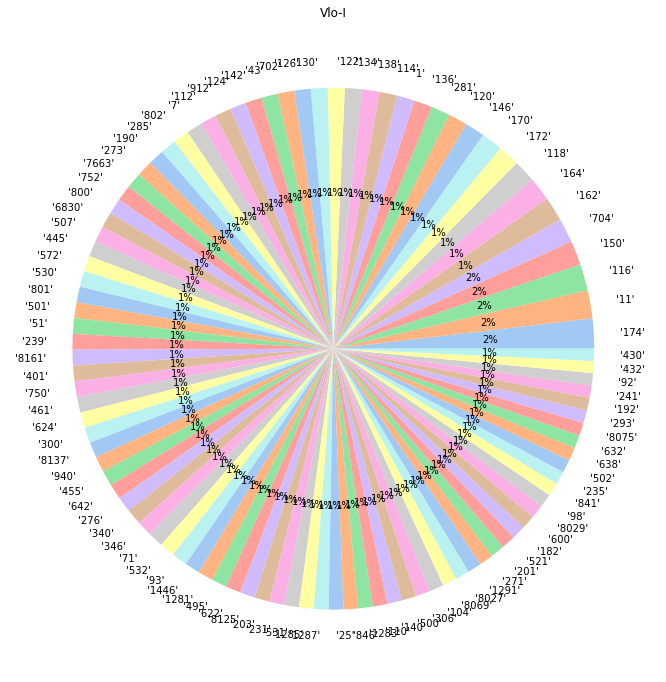

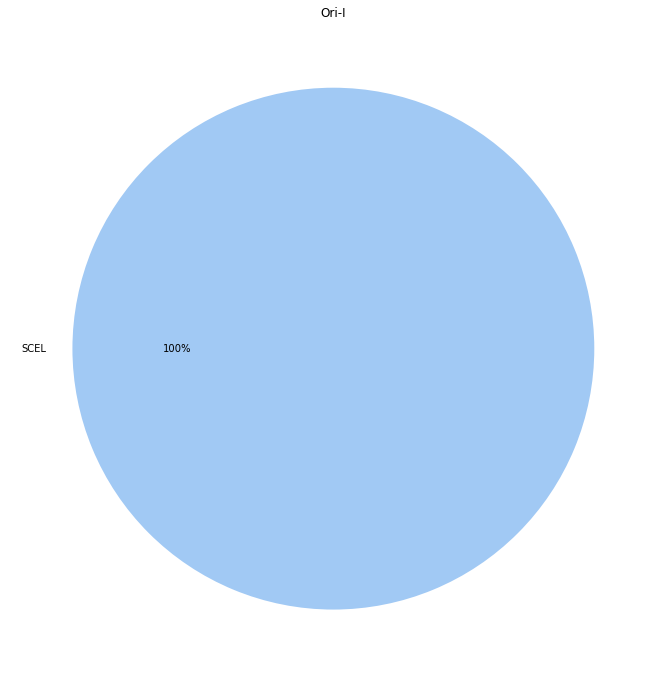

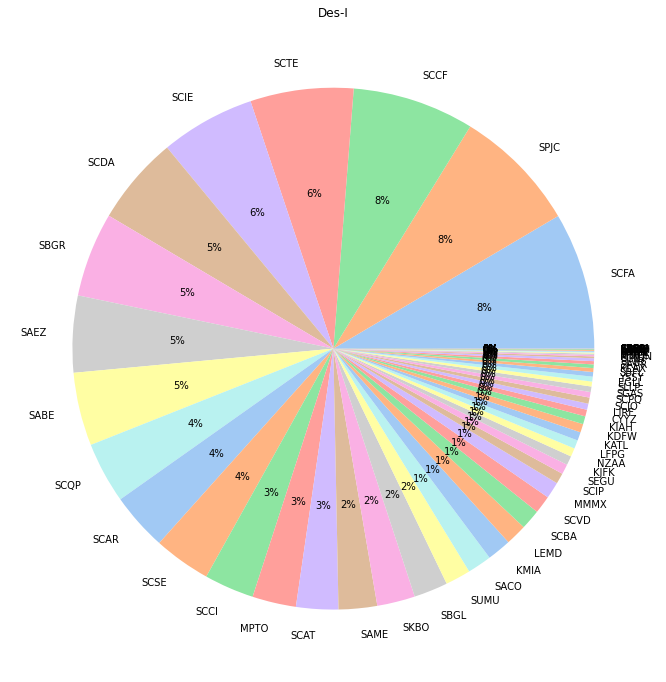

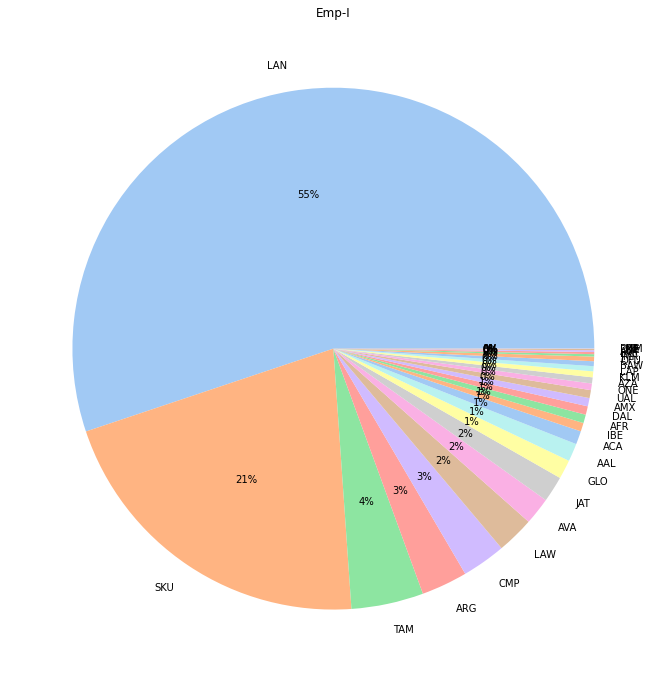

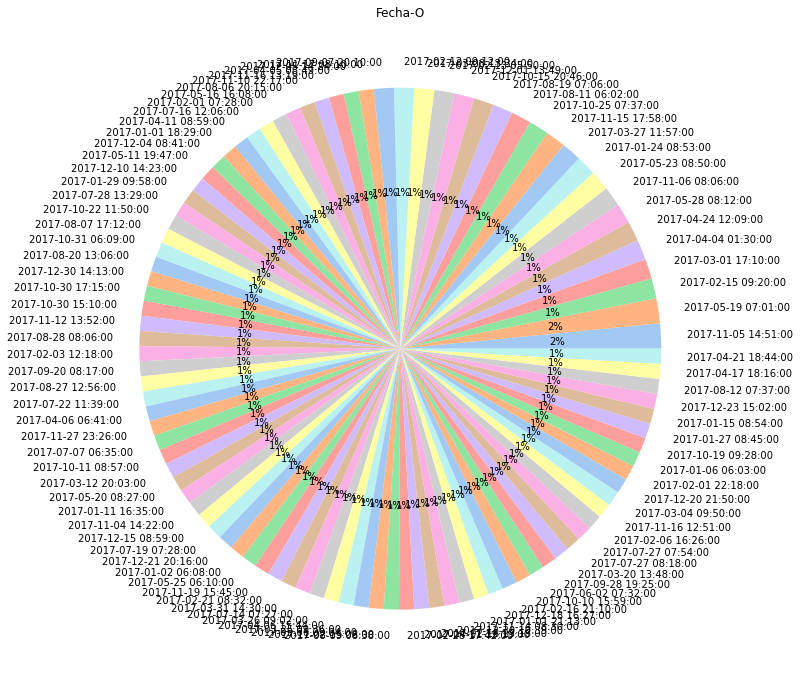

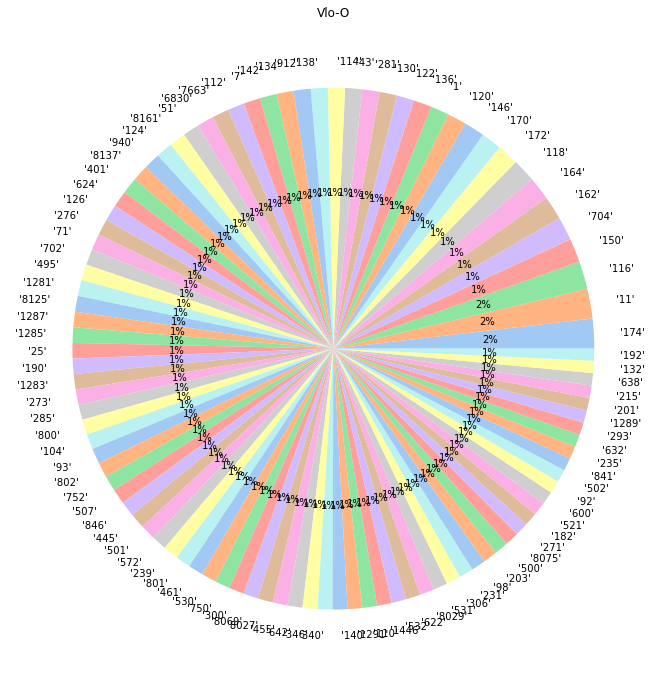

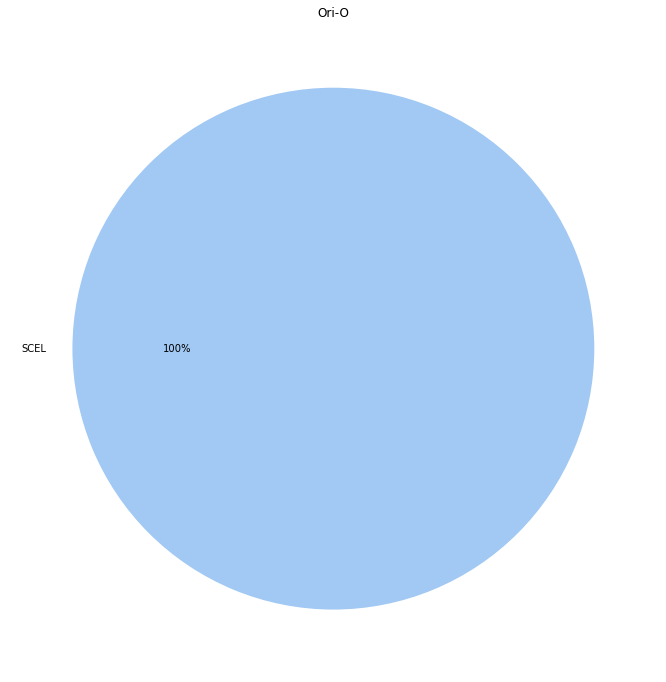

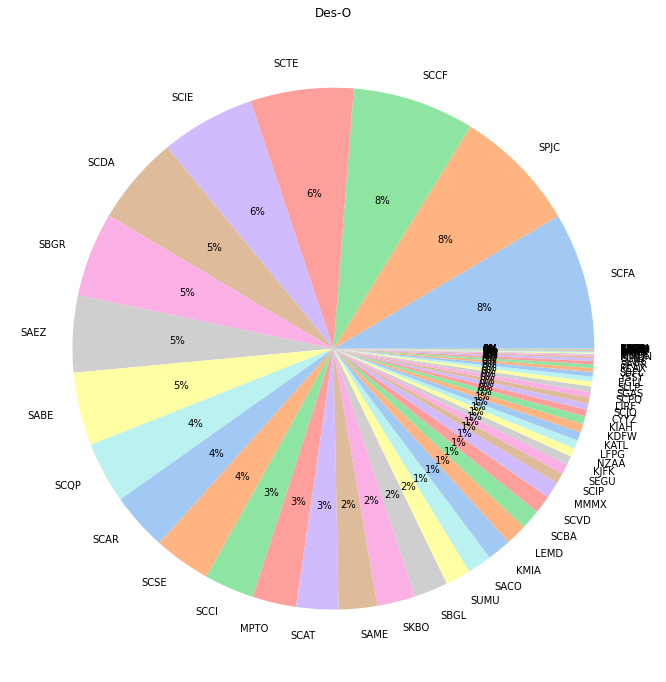

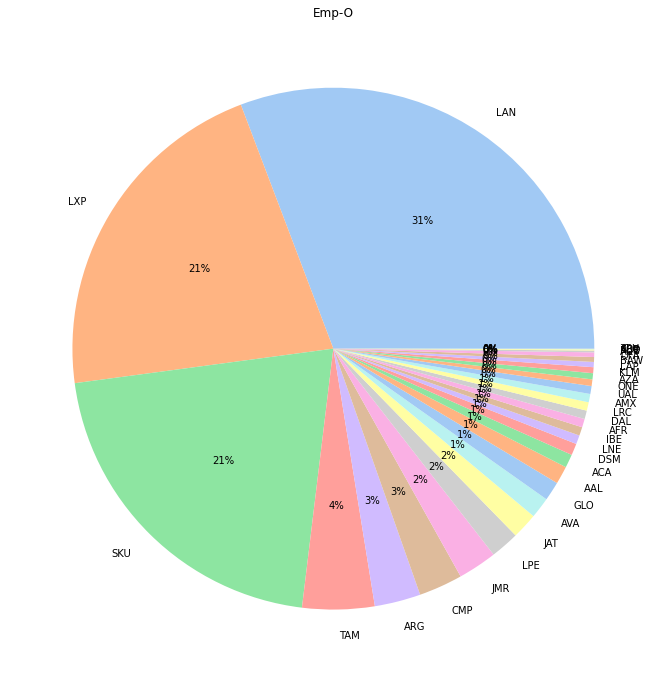

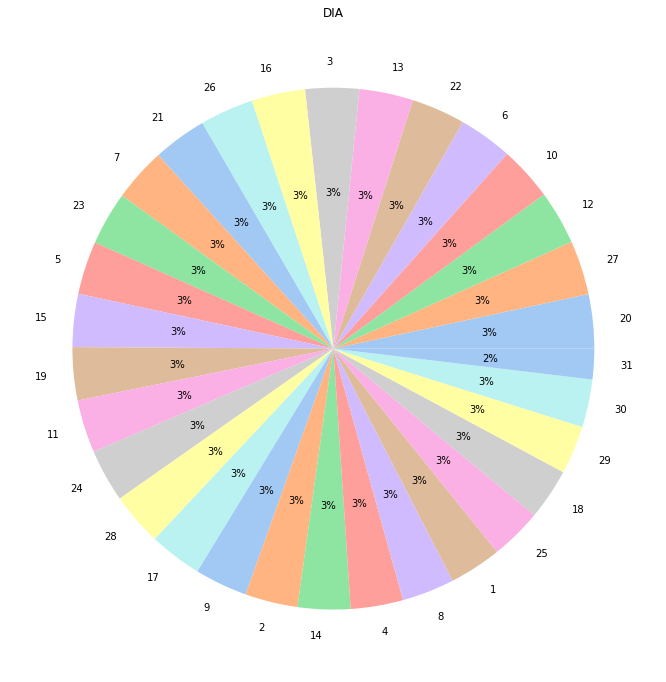

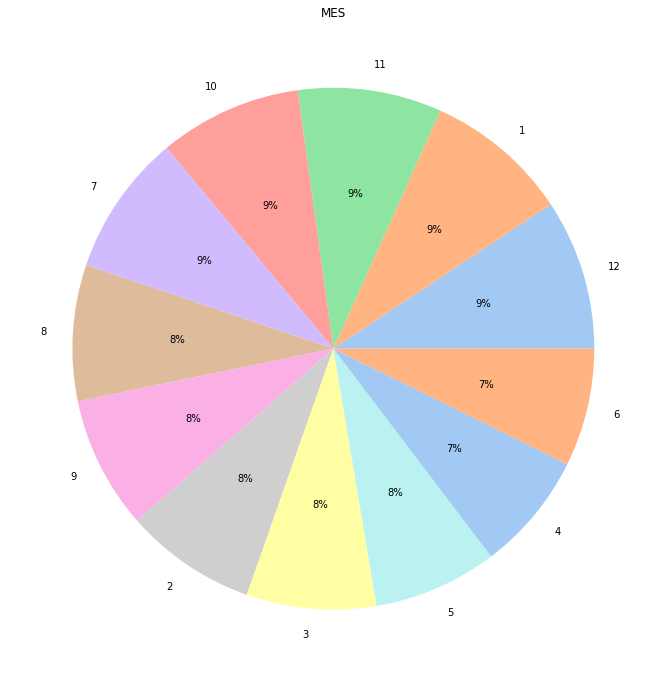

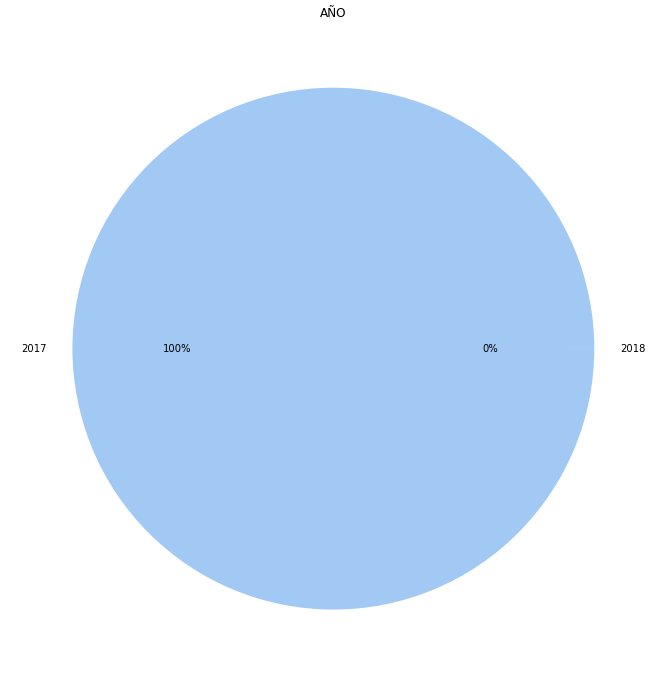

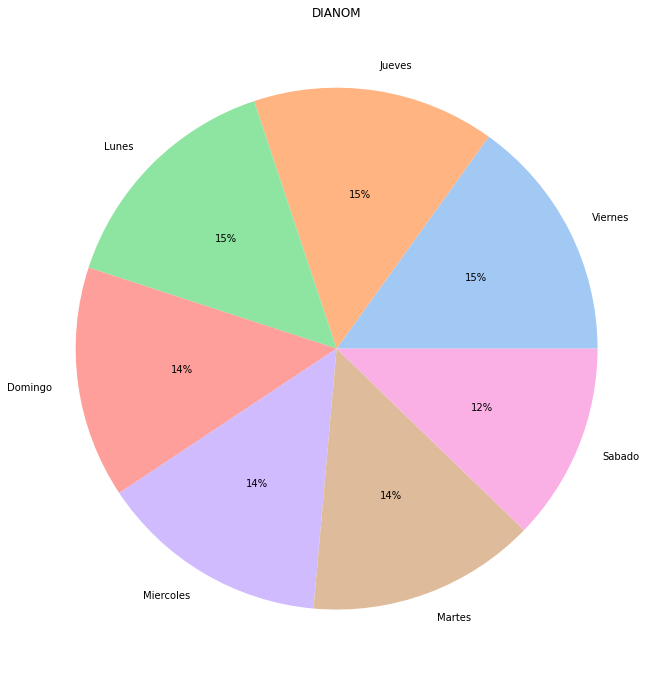

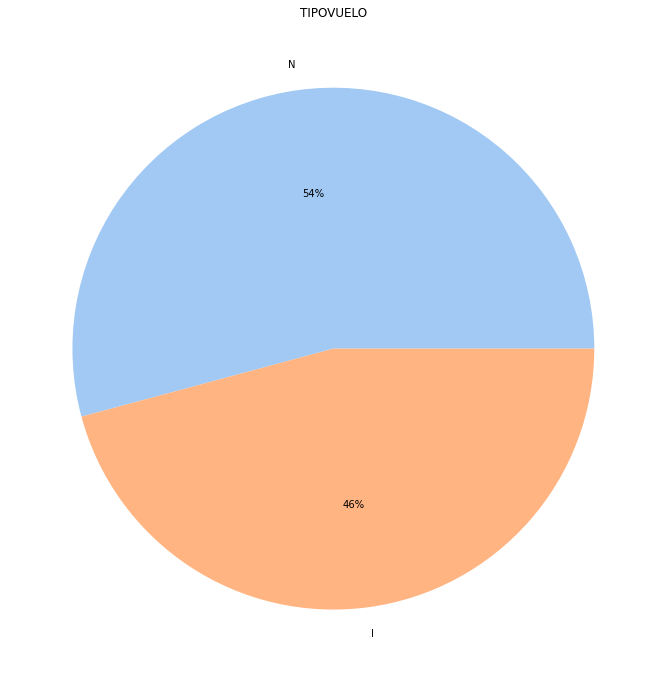

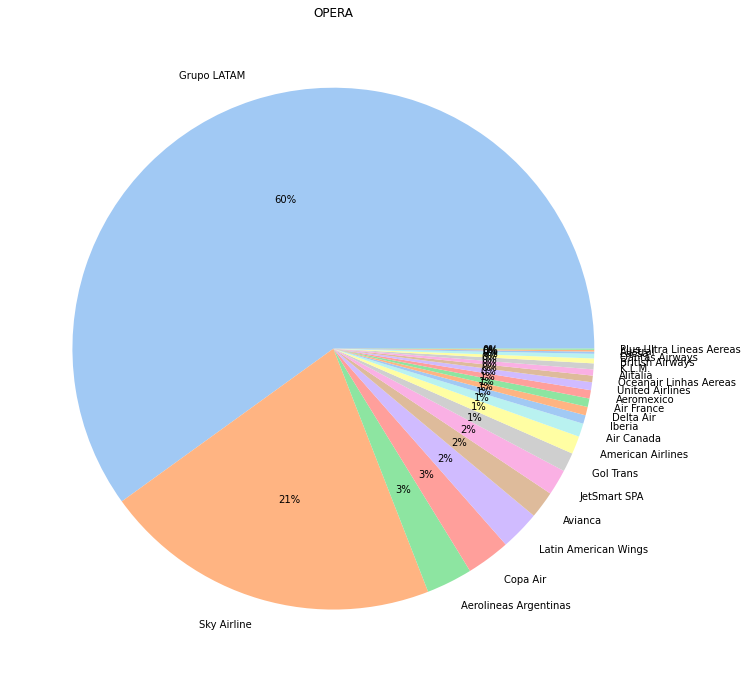

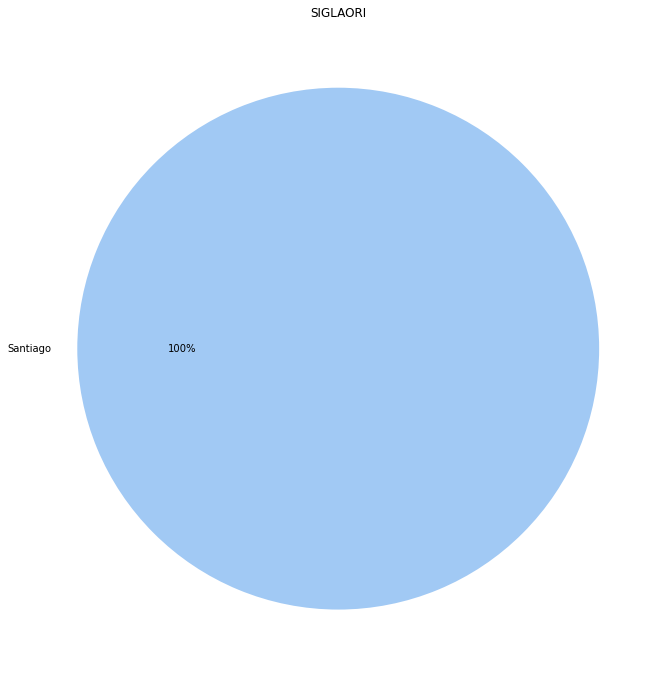

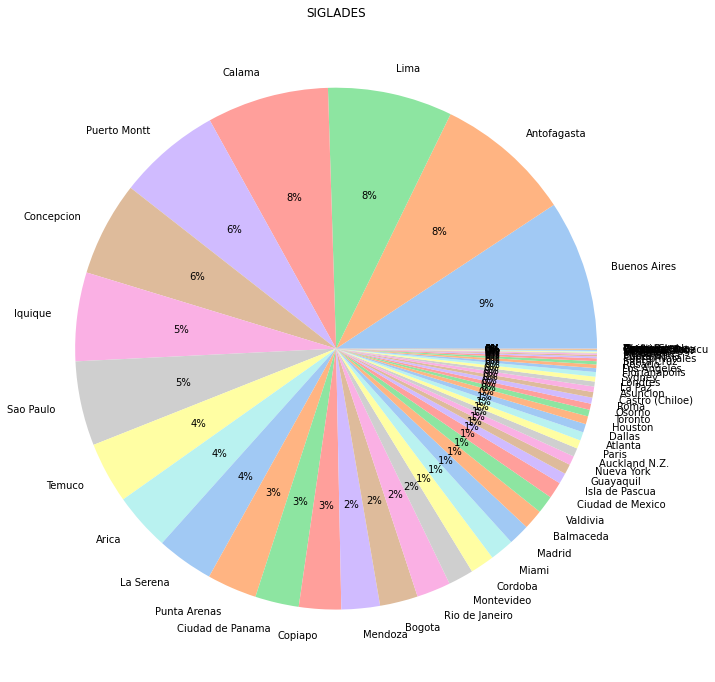

In [186]:
top=100

for n in range(len(df.columns)):
    colors = sns.color_palette('pastel')[0:len(df[list(df.columns.values)[n]].value_counts())]
    plt.figure(figsize=(12, 12))
    plt.title((df.columns.values)[n])
    plt.pie(df[list(df.columns.values)[n]].value_counts().head(top),labels=df[list(df.columns.values)[n]].value_counts().head(top).index.tolist(), autopct='%1.0f%%', colors=colors)
plt.show()



##### Bar charts

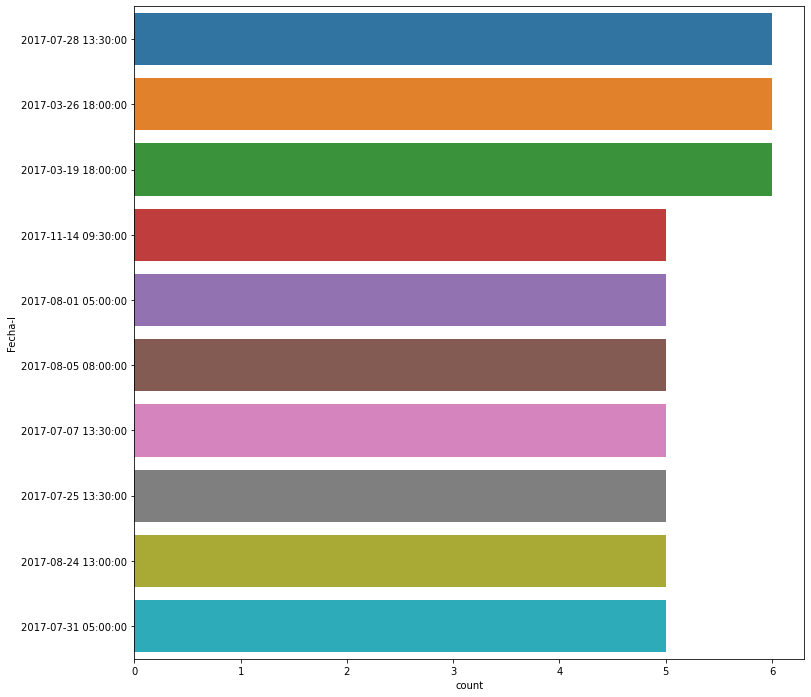

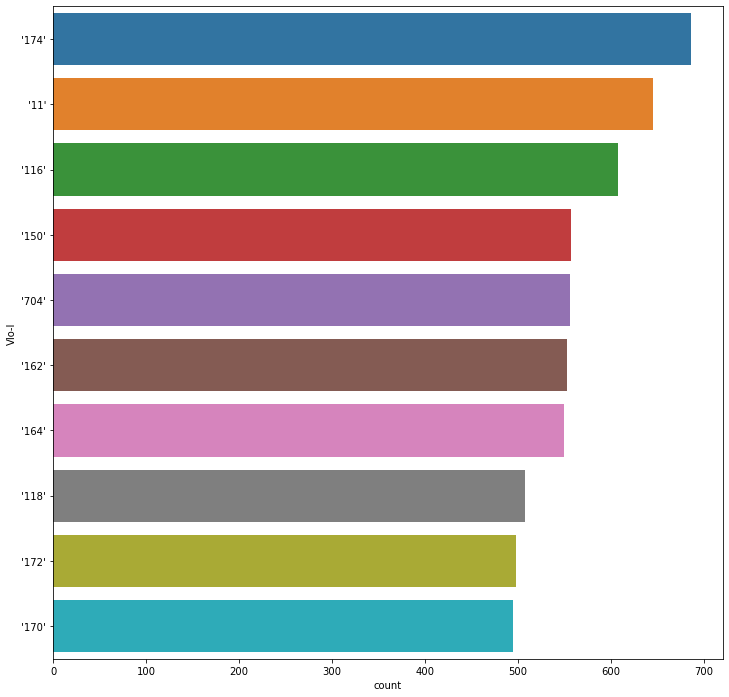

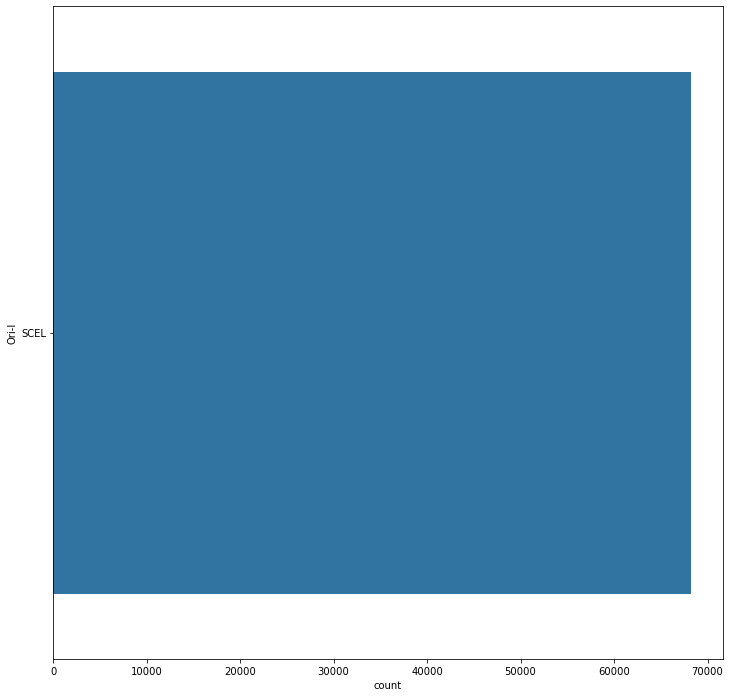

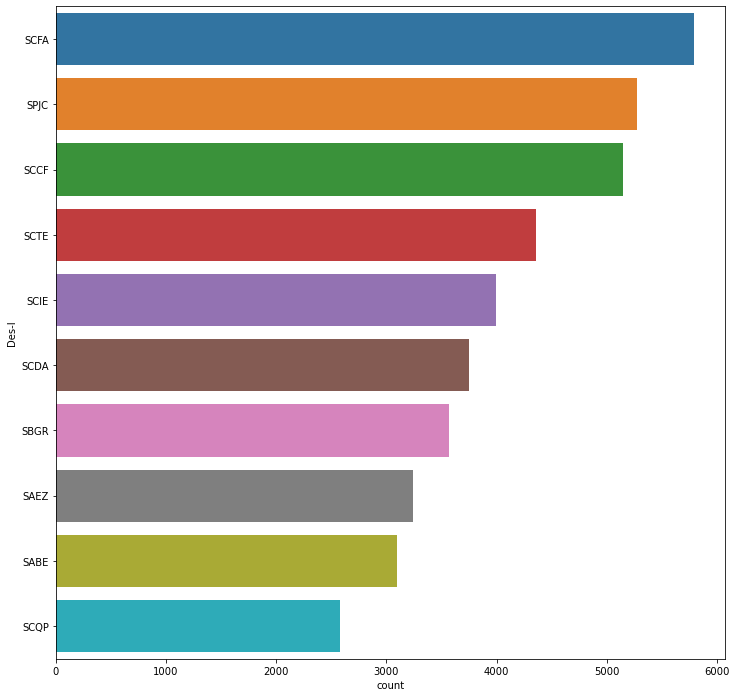

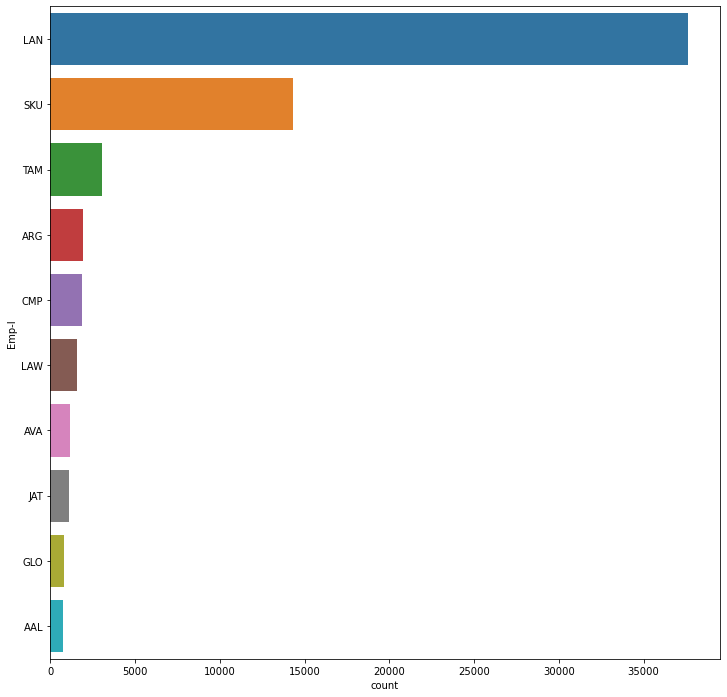

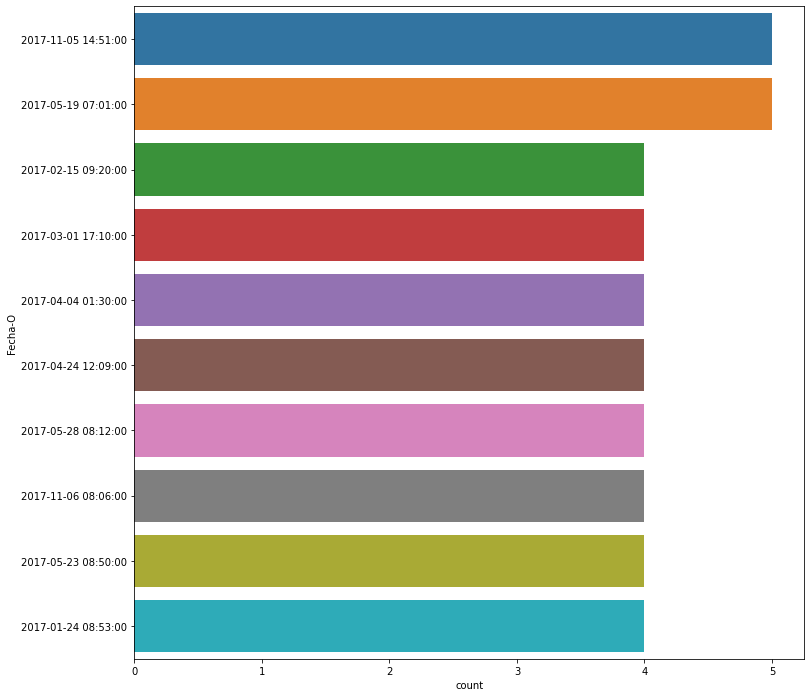

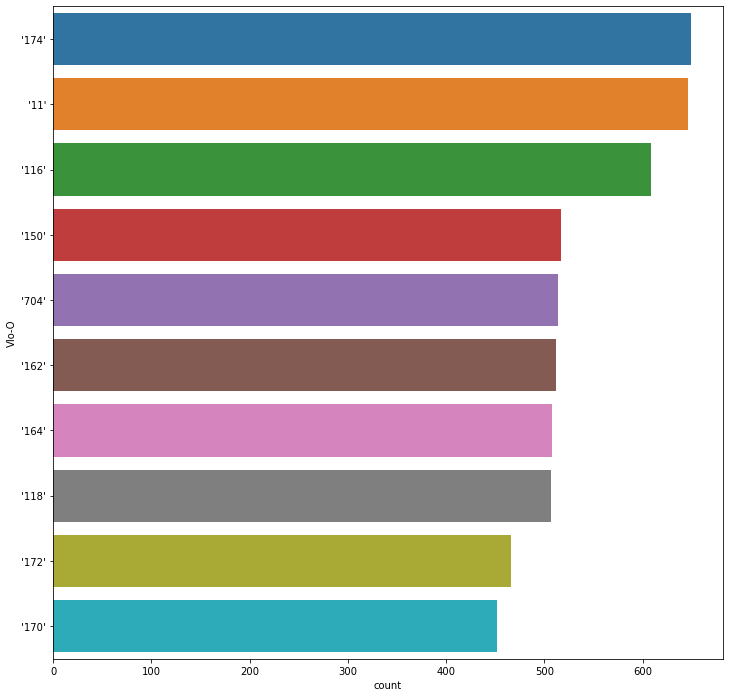

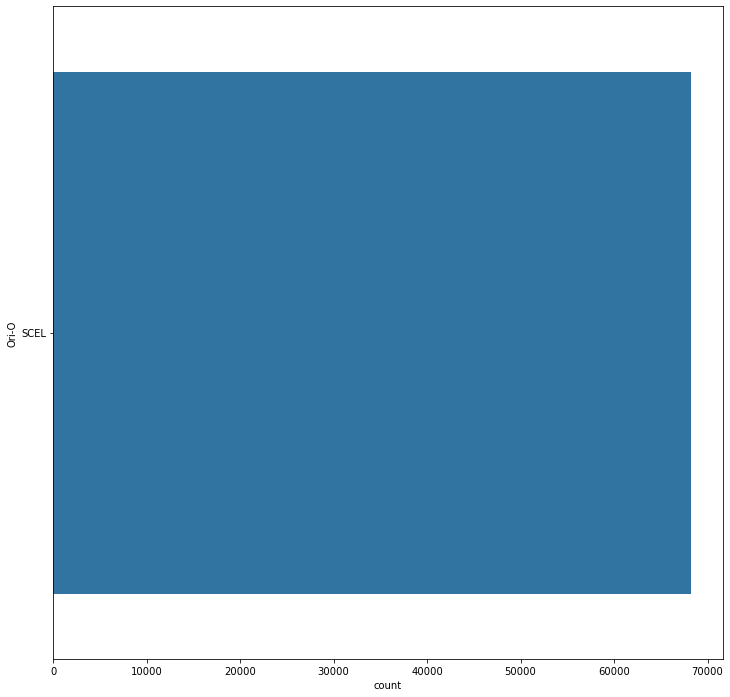

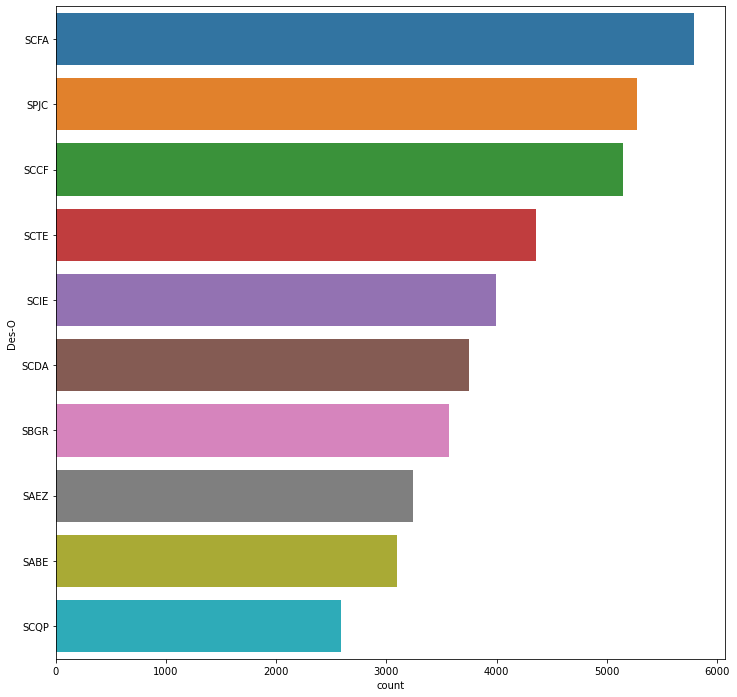

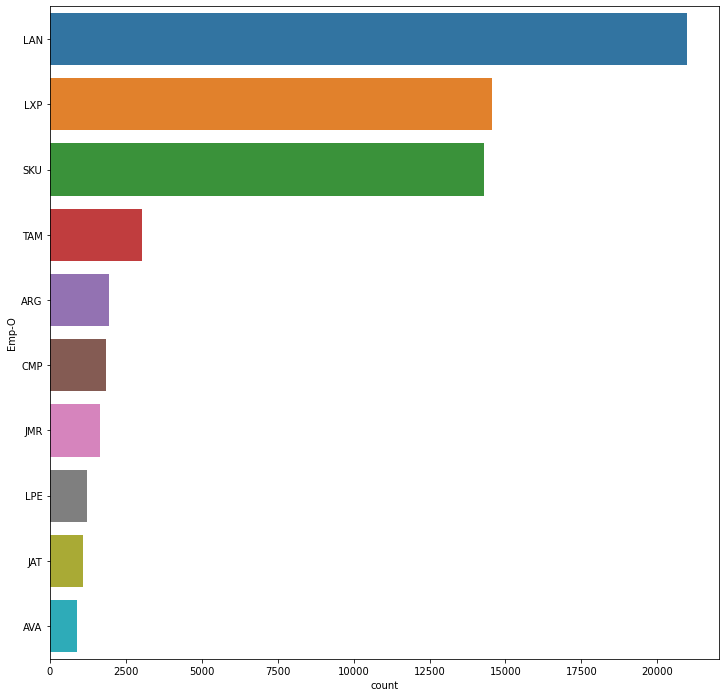

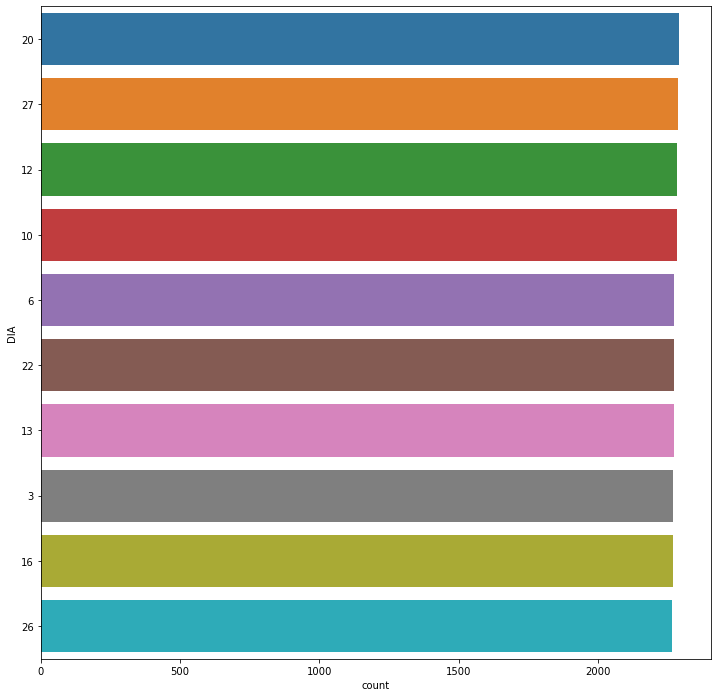

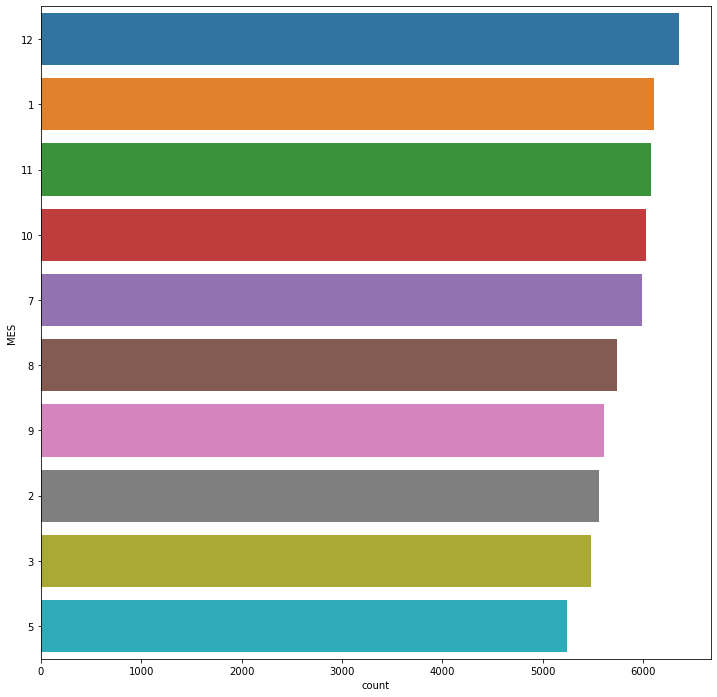

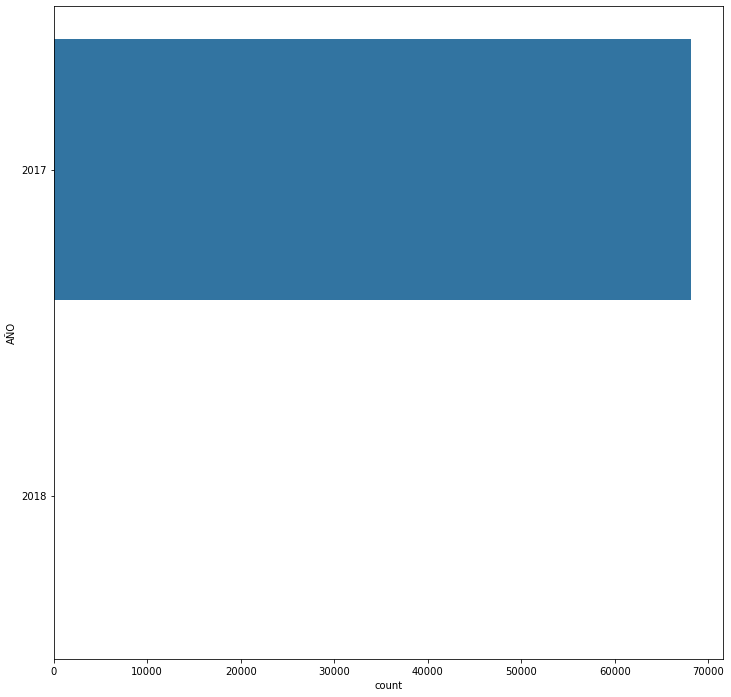

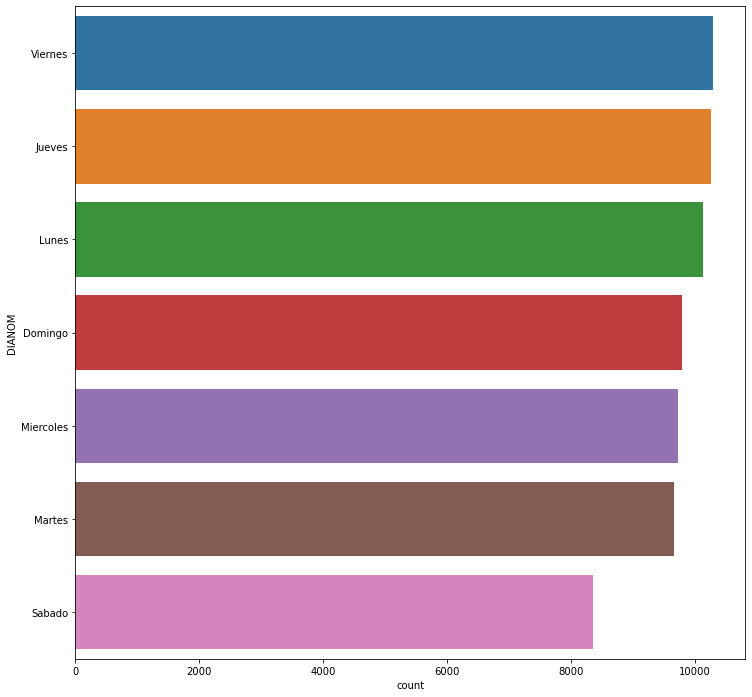

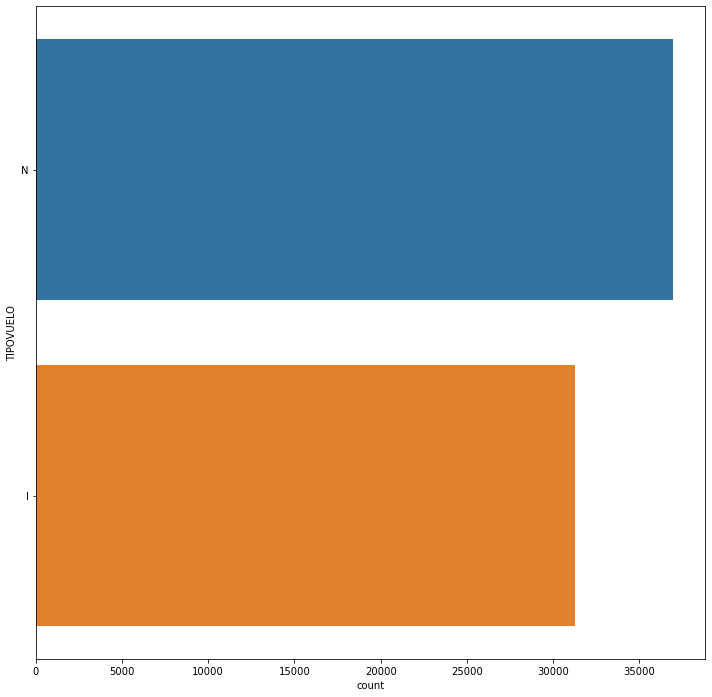

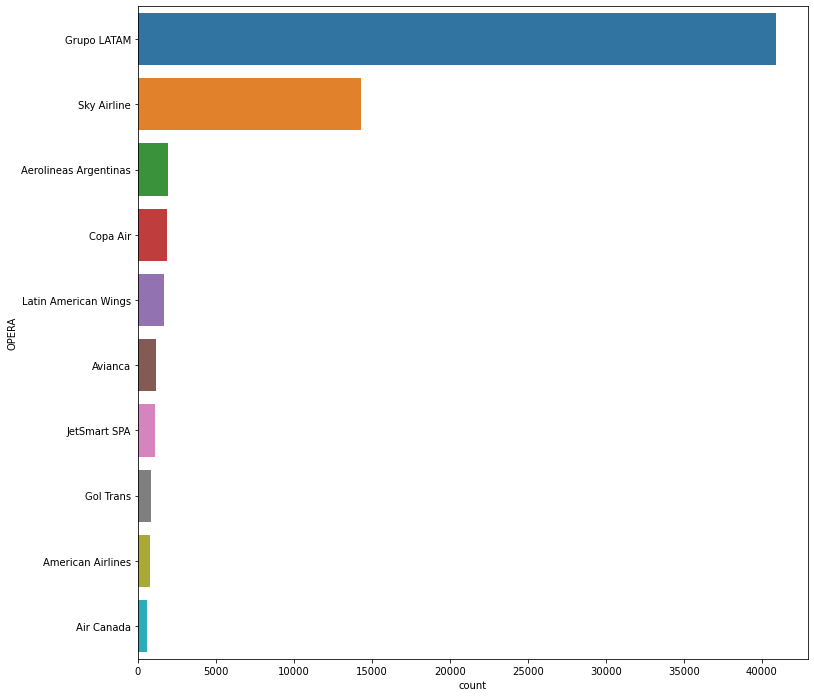

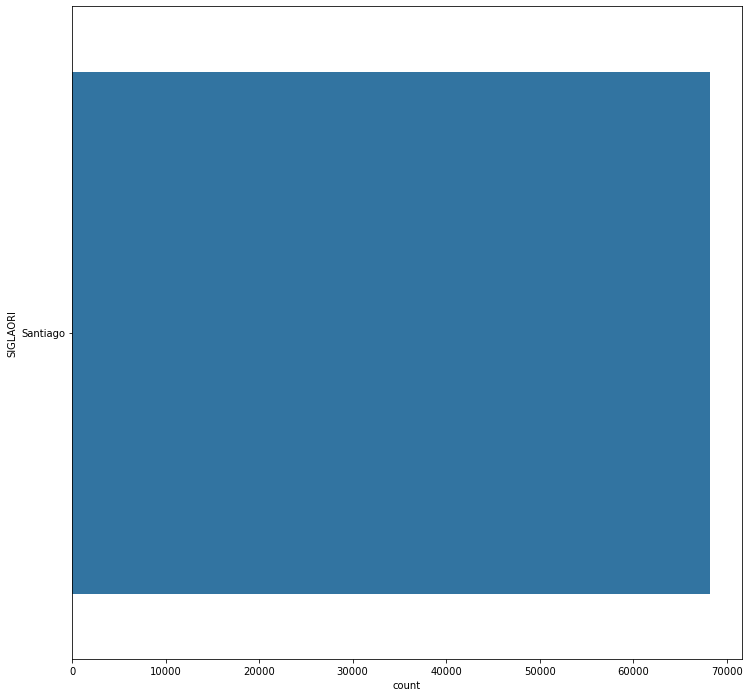

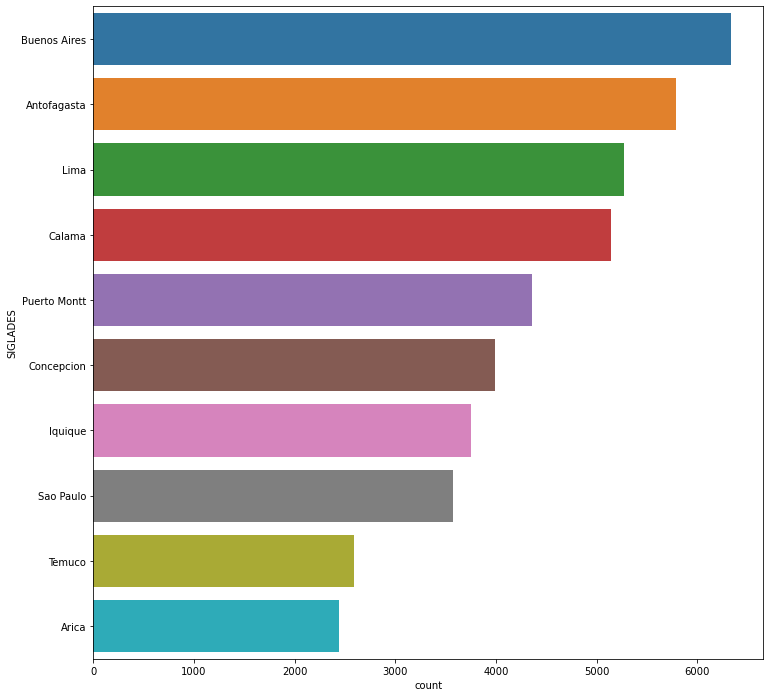

In [121]:
#Top n operadores (cambiar "top" para ver otras opciones)
top=10

for n in range(len(df.columns)):
    count_order = df[list(df.columns.values)[n]].value_counts().head(top).index
    plt.figure(figsize=(12, 12))
    sns.countplot(data=df, y=list(df.columns.values)[n], order=count_order)
plt.show()
